In [1]:
import pandas as pd

Loading the data


In [2]:
df = pd.read_csv('titanic.csv')
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


fare --> amount paid

embarked --> port

sibsp --> sibiling spouse

parch --> parent child





## Data cleanning

1. check for duplicates and handle them

2. check for missing data and handle them(fillna, dropna)

3. check for invalid datatype


In [3]:
df.duplicated().any()#no duplicate rows exists

np.False_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
# age, fare,embarked
# cabin
age_mean = df['age'].mean() #average
print(age_mean)

29.8811345124283


In [6]:
fare_mean = df['fare'].mean() #average
print(fare_mean)

33.29547928134557


In [7]:
emb_mode = df['embarked'].mode()[0] 
print(emb_mode)

S


In [8]:
df['age']=df['age'].fillna(age_mean)
df['age']



0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [9]:
df['fare']=df['fare'].fillna(fare_mean)
df['fare']

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [10]:
df['embarked']=df['embarked'].fillna(emb_mode)
df['embarked']

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [12]:
df = df.dropna(axis=1)

In [13]:
# NO INVALID DATATYPE EXIST
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


## Data Transformation / Feature engineering / Data Manipulation -->

In [14]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1


In [15]:
df['pclass'].unique()

array([1, 2, 3])

In [16]:
df[['lname','temp']] = df['name'].str.split(",", expand = True) #seperated by ',' and index and naming the column
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp
0,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin


In [17]:
df[['courstesy_title','fname']] = df['temp'].str.split('.',expand= True, n=1)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,temp,courstesy_title,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,1,Allen,Miss. Elisabeth Walton,Miss,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,1,Allison,Master. Hudson Trevor,Master,Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,0,Allison,Miss. Helen Loraine,Miss,Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,0,Allison,Mr. Hudson Joshua Creighton,Mr,Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,Zabour,Miss. Hileni,Miss,Hileni
1305,3,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,0,Zabour,Miss. Thamine,Miss,Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,Zakarian,Mr. Mapriededer,Mr,Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,Zakarian,Mr. Ortin,Mr,Ortin


In [18]:
df['lname']=df['lname'].str.strip()

In [19]:
df['fname']=df['fname'].str.strip()

In [20]:
df['courstesy_title'] = df['courstesy_title'].str.strip()

In [21]:
df = df.drop(columns=['name','temp'])
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname
0,1,female,29.000000,0,0,24160,211.3375,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.916700,1,2,113781,151.5500,S,1,Allison,Master,Hudson Trevor
2,1,female,2.000000,1,2,113781,151.5500,S,0,Allison,Miss,Helen Loraine
3,1,male,30.000000,1,2,113781,151.5500,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.000000,1,2,113781,151.5500,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C,0,Zabour,Miss,Hileni
1305,3,female,29.881135,1,0,2665,14.4542,C,0,Zabour,Miss,Thamine
1306,3,male,26.500000,0,0,2656,7.2250,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.000000,0,0,2670,7.2250,C,0,Zakarian,Mr,Ortin


In [22]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [23]:
df = df.rename(columns = {'sex' :'gender'})
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname
0,1,female,29.000000,0,0,24160,211.3375,S,1,Allen,Miss,Elisabeth Walton
1,1,male,0.916700,1,2,113781,151.5500,S,1,Allison,Master,Hudson Trevor
2,1,female,2.000000,1,2,113781,151.5500,S,0,Allison,Miss,Helen Loraine
3,1,male,30.000000,1,2,113781,151.5500,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,female,25.000000,1,2,113781,151.5500,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C,0,Zabour,Miss,Hileni
1305,3,female,29.881135,1,0,2665,14.4542,C,0,Zabour,Miss,Thamine
1306,3,male,26.500000,0,0,2656,7.2250,C,0,Zakarian,Mr,Mapriededer
1307,3,male,27.000000,0,0,2670,7.2250,C,0,Zakarian,Mr,Ortin


In [24]:
df['gender'] = df['gender'].str.capitalize()
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname
0,1,Female,29.000000,0,0,24160,211.3375,S,1,Allen,Miss,Elisabeth Walton
1,1,Male,0.916700,1,2,113781,151.5500,S,1,Allison,Master,Hudson Trevor
2,1,Female,2.000000,1,2,113781,151.5500,S,0,Allison,Miss,Helen Loraine
3,1,Male,30.000000,1,2,113781,151.5500,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,Female,25.000000,1,2,113781,151.5500,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.500000,1,0,2665,14.4542,C,0,Zabour,Miss,Hileni
1305,3,Female,29.881135,1,0,2665,14.4542,C,0,Zabour,Miss,Thamine
1306,3,Male,26.500000,0,0,2656,7.2250,C,0,Zakarian,Mr,Mapriededer
1307,3,Male,27.000000,0,0,2670,7.2250,C,0,Zakarian,Mr,Ortin


In [25]:
df['age']=df['age'].round(1)
df['fare']=df['fare'].round(1)
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname
0,1,Female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton
1,1,Male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor
2,1,Female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine
3,1,Male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton
4,1,Female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni
1305,3,Female,29.9,1,0,2665,14.5,C,0,Zabour,Miss,Thamine
1306,3,Male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer
1307,3,Male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin


In [26]:
df['fam_cnt'] = df['sibsp'] +df['parch']
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt
0,1,Female,29.0,0,0,24160,211.3,S,1,Allen,Miss,Elisabeth Walton,0
1,1,Male,0.9,1,2,113781,151.6,S,1,Allison,Master,Hudson Trevor,3
2,1,Female,2.0,1,2,113781,151.6,S,0,Allison,Miss,Helen Loraine,3
3,1,Male,30.0,1,2,113781,151.6,S,0,Allison,Mr,Hudson Joshua Creighton,3
4,1,Female,25.0,1,2,113781,151.6,S,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,C,0,Zabour,Miss,Hileni,1
1305,3,Female,29.9,1,0,2665,14.5,C,0,Zabour,Miss,Thamine,1
1306,3,Male,26.5,0,0,2656,7.2,C,0,Zakarian,Mr,Mapriededer,0
1307,3,Male,27.0,0,0,2670,7.2,C,0,Zakarian,Mr,Ortin,0


In [27]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
# Renaming  cells in column
p= {'S':'Southampton', 'C':'Cherbourg','Q':'Quuenstown'}
df['embarked']=df['embarked'].replace(p)
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt
0,1,Female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton,0
1,1,Male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3
2,1,Female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3
3,1,Male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3
4,1,Female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni,1
1305,3,Female,29.9,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine,1
1306,3,Male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0
1307,3,Male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0


In [29]:
# replacing "." to " " by indierctly removing charcter
df['ticket']=df['ticket'].str.replace('.','')

In [30]:
df['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'WEP 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804', 'FC 12750',
       '17474', '33638', 'PC 17761', '11755', 'PC 17485', 'PC 17580',
       '11767', '36947', 'PC 17531', 'PC 17598', '17421', 'PC 17474',
       '113051', '19950', '113778', 'PC 17611', '17765', '13568', '13567',
       '112058', '113803', '111320', '113503', '112378', 'PC 17593',
       '1

In [31]:
# Count of each value in the column
# df['ticket'].value_counts().index
# df['ticket'].value_counts().values

df['ticket'].value_counts().reset_index()



,ticket,count
0,CA 2343,11
1,CA 2144,8
2,1601,8
3,347082,7
4,SOC 14879,7
...,...,...
924,364511,1
925,364499,1
926,349216,1
927,383121,1


In [32]:
# res = df['ticket'].value_counts().reset_index()
# res

# resetting the column with index
tick_df=df['ticket'].value_counts().reset_index()

In [33]:
tick_df = tick_df.rename(columns={'count':'psg_count'})
tick_df

,ticket,psg_count
0,CA 2343,11
1,CA 2144,8
2,1601,8
3,347082,7
4,SOC 14879,7
...,...,...
924,364511,1
925,364499,1
926,349216,1
927,383121,1


In [34]:
df = df.merge(tick_df , how ='inner', on = 'ticket')
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt,psg_count
0,1,Female,29.0,0,0,24160,211.3,Southampton,1,Allen,Miss,Elisabeth Walton,0,4
1,1,Male,0.9,1,2,113781,151.6,Southampton,1,Allison,Master,Hudson Trevor,3,6
2,1,Female,2.0,1,2,113781,151.6,Southampton,0,Allison,Miss,Helen Loraine,3,6
3,1,Male,30.0,1,2,113781,151.6,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3,6
4,1,Female,25.0,1,2,113781,151.6,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Hileni,1,2
1305,3,Female,29.9,1,0,2665,14.5,Cherbourg,0,Zabour,Miss,Thamine,1,2
1306,3,Male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0,1
1307,3,Male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0,1


In [35]:
# df.merge(tick_df, how = 'inner' , left_on = 'ticket' , right_on='tick')
# if no common column name or different colunm spelling is present use left_on and right_on 

In [36]:
df['fare']=(df['fare']/df['psg_count']).round(1)
df


,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt,psg_count
0,1,Female,29.0,0,0,24160,52.8,Southampton,1,Allen,Miss,Elisabeth Walton,0,4
1,1,Male,0.9,1,2,113781,25.3,Southampton,1,Allison,Master,Hudson Trevor,3,6
2,1,Female,2.0,1,2,113781,25.3,Southampton,0,Allison,Miss,Helen Loraine,3,6
3,1,Male,30.0,1,2,113781,25.3,Southampton,0,Allison,Mr,Hudson Joshua Creighton,3,6
4,1,Female,25.0,1,2,113781,25.3,Southampton,0,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,14.5,1,0,2665,7.2,Cherbourg,0,Zabour,Miss,Hileni,1,2
1305,3,Female,29.9,1,0,2665,7.2,Cherbourg,0,Zabour,Miss,Thamine,1,2
1306,3,Male,26.5,0,0,2656,7.2,Cherbourg,0,Zakarian,Mr,Mapriededer,0,1
1307,3,Male,27.0,0,0,2670,7.2,Cherbourg,0,Zakarian,Mr,Ortin,0,1


In [37]:
#string comparison using int is possible in sql and pandas
# checks using asci value if asci value is same or satisfies the condition then true
# example
'55'<'551' #checks asci(5) = asci(5) since 551 has 3 digits which is greater than 55 so it returns true
# '99'<'100' --> false

True

In [38]:
df =df.sort_values(by=['ticket'], ascending = True)

In [39]:
df = df.reset_index(drop = True)
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt,psg_count
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,29.9,0,0,W/C 6609,7.6,Southampton,0,Harknett,Miss,Alice Phoebe,0,1
1305,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2
1306,1,Female,36.0,0,2,WE/P 5735,35.5,Southampton,1,Crosby,Miss,Harriet R,2,2
1307,1,Female,47.0,1,0,WEP 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2


In [40]:
def com_type(row):
    f = row['fam_cnt']
    p = row['psg_count']
    if p==1:
        return "solo"
    elif f==0 and p>1:
        return 'friends'
    else:
        return 'family'




In [41]:
import importlib
import titanic_functions as tf
importlib.reload(tf)


<module 'titanic_functions' from 'd:\\pyspider\\Data Analysis\\titanic_functions.py'>

In [42]:
df['courstesy_title'].unique()

array(['Miss', 'the Countess', 'Mrs', 'Mr', 'Dr', 'Major', 'Master',
       'Col', 'Lady', 'Jonkheer', 'Rev', 'Ms', 'Mme', 'Mlle', 'Sir',
       'Don', 'Dona', 'Capt'], dtype=object)

In [43]:
df['companion type'] = df.apply(tf.com_type, axis = 1)
df

,pclass,gender,age,sibsp,parch,ticket,fare,embarked,survived,lname,courstesy_title,fname,fam_cnt,psg_count,companion type
0,1,Female,30.0,0,0,110152,28.8,Southampton,1,Cherry,Miss,Gladys,0,3,friends
1,1,Female,33.0,0,0,110152,28.8,Southampton,1,Rothes,the Countess,of (Lucy Noel Martha Dyer-Edwards),0,3,friends
2,1,Female,16.0,0,0,110152,28.8,Southampton,1,Maioni,Miss,Roberta,0,3,friends
3,1,Female,18.0,0,2,110413,26.5,Southampton,1,Taussig,Miss,Ruth,2,3,family
4,1,Female,39.0,1,1,110413,26.5,Southampton,1,Taussig,Mrs,Emil (Tillie Mandelbaum),2,3,family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Female,29.9,0,0,W/C 6609,7.6,Southampton,0,Harknett,Miss,Alice Phoebe,0,1,solo
1305,1,Male,70.0,1,1,WE/P 5735,35.5,Southampton,0,Crosby,Capt,Edward Gifford,2,2,family
1306,1,Female,36.0,0,2,WE/P 5735,35.5,Southampton,1,Crosby,Miss,Harriet R,2,2,family
1307,1,Female,47.0,1,0,WEP 5734,30.6,Southampton,1,Chaffee,Mrs,Herbert Fuller (Carrie Constance Toogood),1,2,family


In [44]:
def social_status(row):
    c = row["courstesy_title"]
    if c in []:
        return 'Common'
    elif c in []:
        return 'Royal'
    elif c in []:
        return 'Military'
    else:
        return 'Other Professional'


In [45]:
df['social_status'] = df.apply(social_status , axis =1)
# or

# df['companion type'] = df.apply(tf.soacial_status , axis = 1)

In [46]:
df['age_category'] = pd.cut(df['age'] , 
       bins = [0,2,16,25,59,100], 
       labels = ['Infant' , 'Child' , 'Teen' , 'Adult', 'Senior']) # return type is series

# if 105 age passenger is there no condition is given therefore it returns missing data ie. empty cell , cut and apply
# rightside numbers are inclusive (0,2]

In [47]:
df.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'survived', 'lname', 'courstesy_title', 'fname', 'fam_cnt',
       'psg_count', 'companion type', 'social_status', 'age_category'],
      dtype='object')

In [48]:
new_order = ['ticket','gender','age','age_category','courstesy_title','social_status','sibsp','parch','psg_count','fam_cnt','companion type','pclass','fare','embarked','survived' ]

In [49]:
df = df[new_order]
df

,ticket,gender,age,age_category,courstesy_title,social_status,sibsp,parch,psg_count,fam_cnt,companion type,pclass,fare,embarked,survived
0,110152,Female,30.0,Adult,Miss,Other Professional,0,0,3,0,friends,1,28.8,Southampton,1
1,110152,Female,33.0,Adult,the Countess,Other Professional,0,0,3,0,friends,1,28.8,Southampton,1
2,110152,Female,16.0,Child,Miss,Other Professional,0,0,3,0,friends,1,28.8,Southampton,1
3,110413,Female,18.0,Teen,Miss,Other Professional,0,2,3,2,family,1,26.5,Southampton,1
4,110413,Female,39.0,Adult,Mrs,Other Professional,1,1,3,2,family,1,26.5,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,W/C 6609,Female,29.9,Adult,Miss,Other Professional,0,0,1,0,solo,3,7.6,Southampton,0
1305,WE/P 5735,Male,70.0,Senior,Capt,Other Professional,1,1,2,2,family,1,35.5,Southampton,0
1306,WE/P 5735,Female,36.0,Adult,Miss,Other Professional,0,2,2,2,family,1,35.5,Southampton,1
1307,WEP 5734,Female,47.0,Adult,Mrs,Other Professional,1,0,2,1,family,1,30.6,Southampton,1


## Data Aanlysis

In [50]:
df.shape

(1309, 15)

In [51]:
df.describe()
df[['age','fare']].describe().round(1)

,age,fare
count,1309.0,1309.0
mean,29.9,14.8
std,12.9,13.6
min,0.2,0.0
25%,22.0,7.6
50%,29.9,8.1
75%,35.0,15.0
max,80.0,128.1


## age
Psg age is around 29.8 (age can be more/less than 29.8)

68% psg age lies between (29.8-12.9) = 16.9 to (29.8+12.9) = 42.7

least age is 0.2 & highest age is 80

25% of psg age are present below 22

50% of psg age are present below 29.9

75% of psg age are present below 35

<---------------------------------------------->

------0.2--22%--------29.9---------35---------80
        

0%--------25%---------50%----------75%---------

## fare

Psg fare is around 14.8 (age can be more/less than 14.8)

68% psg fare lies between (14.8-13.6) = 0.8 to (14.8+13.6) = 28.4

least fare 0 & highest fare is 128.1

25% of psg fare are present below 7.6

50% of psg fare are present below 8.1

75% of psg fare are present below 15




In [52]:
df['gender'].value_counts()


gender
Male      843
Female    466
Name: count, dtype: int64

### male psg are more than female psg

In [53]:
df['pclass'].value_counts()



pclass
3    709
1    323
2    277
Name: count, dtype: int64

### psg cls 3 is having more psg followed by pcls 1 and pcls 2

In [54]:
df[['gender','pclass']].value_counts()

gender  pclass
Male    3         493
Female  3         216
Male    1         179
        2         171
Female  1         144
        2         106
Name: count, dtype: int64

In [55]:
pd.pivot_table(df,index=['pclass'],
               columns=['gender'],
               values=['ticket'],
               aggfunc=['count'],
               margins= True)

count           
       ticket           
gender Female Male   All
pclass                  
1         144  179   323
2         106  171   277
3         216  493   709
All       466  843  1309

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Plot the number of male and female passenger's ?

## countplot(int,str) -- categorical data -- using only for less unique values

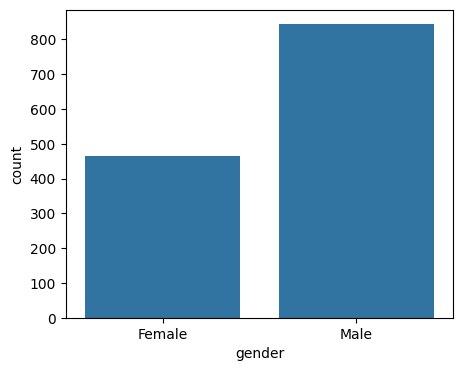

In [73]:
plt.figure(figsize=(5,4))
sns.countplot(df,x = 'gender')
plt.show()

Female psg's are comparitively less than number of Male psg's

<Axes: xlabel='gender', ylabel='count'>

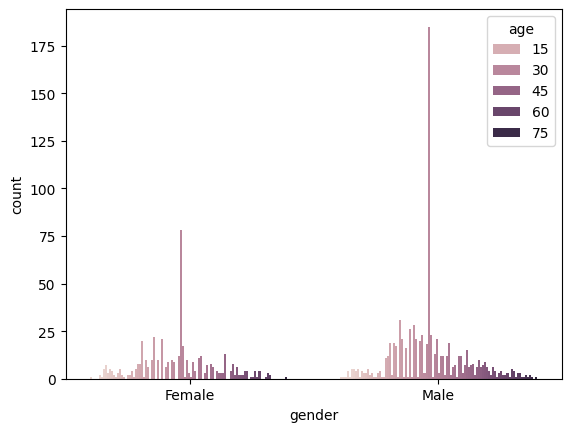

In [69]:
sns.countplot(df,x = 'gender', hue='age')

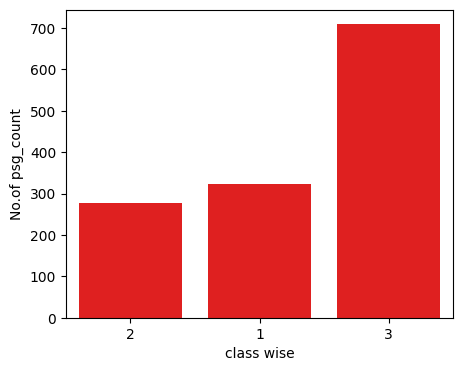

In [ ]:
plt.figure(figsize=(5,4))
plt.xlabel('class wise')
plt.ylabel('No.of psg_count')
sns.countplot(df,x = 'pclass',order=[2,1,3],color='red')
plt.show()

Above plt is represent's Number of psg in each pclass 
* pclass 3 is having more psg's compare to 2 and 1 class


### plt number of survived and non survived psg's?

In [91]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

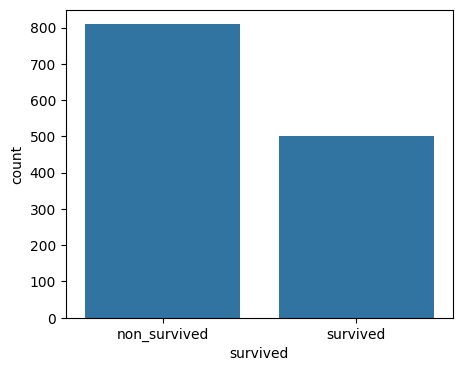

In [96]:
plt.figure(figsize=(5,4))
sns.countplot(df,x = 'survived')
plt.xticks(ticks=[0,1],labels=['non_survived','survived'])
plt.show()

The count of the survived passenger's is almost half of the count of Non-survived passenger's

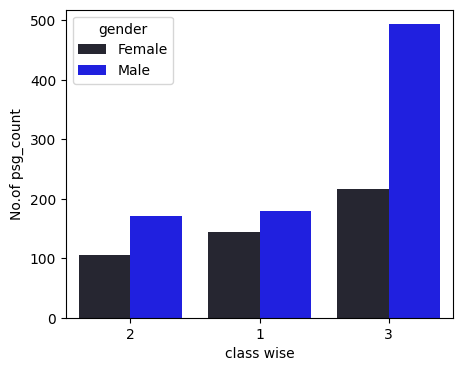

In [109]:
plt.figure(figsize=(5,4))
plt.xlabel('class wise')
plt.ylabel('No.of psg_count')
sns.countplot(df,x = 'pclass',order=[2,1,3],color='red',hue='gender',palette='dark:blue')
plt.show()